In [4]:
from IPython.display import Latex
Latex(filename="../notation/notation.tex")

<IPython.core.display.Latex object>

# Introduction to Deep Learning

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Deep Learning

<center><img src="./assets/deep-learning.svg"></center>

## The Perceptron (Forward Propagation)

The fundamental building block of deep learning

<center><img src='./assets/simple_perceptron.svg'></center>

$$
\hat{y} = g \left(\sum_{i=1}^{m} x_{i}w_{i} \right)
$$

<center><img src='./assets/perceptron.svg'></center>


$$
\hat{y} = g \left( w_0 + \sum_{i=1}^{m} x_{i}w_{i} \right)
$$

linear algebra version:

$$
\hat{y} = g ( w_{0} + \mathbf{X}^{T} \mathbf{W} )
$$

Where:  
$$
\mathbf{X} = \begin{bmatrix}
x_1 \\
\vdots \\
x_m
\end{bmatrix}
$$

and
$$
\mathbf{W} = \begin{bmatrix}
w_1 \\
\vdots \\
w_m
\end{bmatrix}
$$

$g$ represents the activation function

## Common activation function

**Sigmoid Function**


$$ g(z) = \frac{1}{1+e^{-z}} $$

$$ g'(z) = g(z)(1-g(z)) $$

```python
tf.math.sigmoid(z)
```

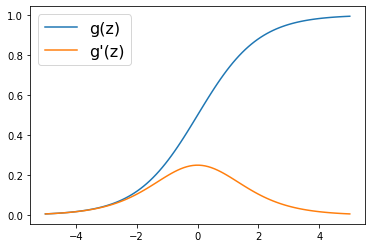

In [6]:
z = np.linspace(-5, 5, num=100)
sig = tf.math.sigmoid(z)
sig_prime = sig * (1 - sig)

plt.plot(z, sig, label="g(z)")
plt.plot(z, sig_prime, label="g'(z)")
plt.legend(prop={'size' : 16})
plt.show()

**Hyperbolic Tangent**

$$ g(z) = \frac{e^z - e^{-z}}{e^z + e^{z}} $$

$$ g'(z) = 1 - g(z)^2 $$

```python
tf.math.tanh(z)
```

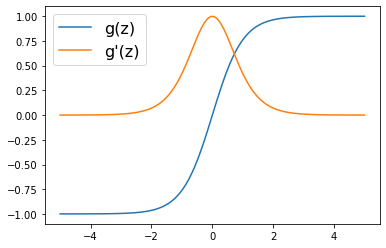

In [7]:
z = np.linspace(-5, 5, num=100)
tan = tf.math.tanh(z)
tan_prime = 1 - tan**2

plt.plot(z, tan, label="g(z)")
plt.plot(z, tan_prime, label="g'(z)")
plt.legend(prop={'size' : 16})
plt.show()

**Rectified Linear Unit (ReLU)**

$$g(z) = max(0,z)$$

$$g'(z) = \left\{\begin{matrix}
1,  z >0 \\
0, otherwise
\end{matrix}\right.
$$

```python
tf.math.relu(z)
```

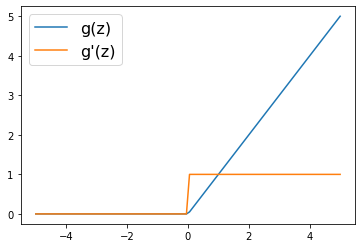

In [8]:
z = np.linspace(-5, 5, num=100)
relu = tf.nn.relu(z)
relu_prime = z > 0

plt.plot(z, relu, label="g(z)")
plt.plot(z, relu_prime, label="g'(z)")
plt.legend(prop={'size' : 16})
plt.show()

## Importance of activation function

Introduce non-linearity in the network

<center><img src="./assets/activation-function.svg"></center>

## The Perceptron (Simplified)

$$ z = w_0 + \sum^{m}_{j=1} x_j w_{j}$$ 
$$ \hat{y} = g(z)$$

<center><img src="./assets/simplified-perceptron.svg"></center>

## Multi Output Perceptron


$$ z_i = w_{0,i} + \sum^{m}_{j=1} x_j w_{j,i}$$ 
$$ \hat{y}_i = g(z_i)$$


<center><img src="./assets/multi-output-perceptron.svg"></center>

## Dense Layer

Also called **Fully connected layers**

From scratch using tensorflow:
```python
class MyDenseLayer(tf.keras.layers.Layer)
	def __init__(self, input_dim, output_dim):
		super(MyDenseLayer, self).__init__()
		
		# Initialize weights and bias
		self.W = self.add_weight([input_dim, output_dim])
		self.b = self.add_weight([1, output_dim])
	
	def call(self, inputs):
		# Forward propagate the inputs
		z = tf.matmul(inputs, self.W) + self.b
		
		# Feed Through a non-linear activation
		output = tf.math.sigmoid(z)
		
		return output
		
```

Simplified version using tensorflow:

```python
import tensorflow as tf

layer = tf.keras.layers.Dense(units=2)
```


## Single Layer Neural Network

<center><img src="./assets/single-layer-neural-network.svg"></center>

Also represented like:

<center><img src="./assets/simplified-single-layer-neural-network.svg"></center>

## Multi Output Perceptron

Is very simple create a model, it's just need to keep adding layers to our model

```python

model = tf.keras.Sequential([
	tf.keras.layers.Dense(n),
	tf.keras.layers.Dense(2)
])

```


**Deep Neural network**

```python

model = tf.keras.Sequential([
	tf.keras.layers.Dense(n1),
	tf.keras.layers.Dense(n2)
	...
	...
	tf.keras.layers.Dense(2)
])

```


## Quantifying Loss

The **loss** measure the cost incurred from incorrect predictions

$$
\mathcal{L}(f(x^{(i)};\mathbf{W}), y^{(i)})
$$

$$
\mathcal{L}(\hat{y}^{(i)}, y^{(i)})
$$

## Empirical Loss

**Also known as:**
- Objective function
- Cost function
- Empirical risk

$$
\mathbf{J}(\mathbf{W}) = \frac{1}{n} \sum^{n}_{i=1} \mathcal{L}(f(x^{(i)};\mathbf{W}), y^{(i)})
$$

$$
\mathbf{J}(\mathbf{W}) = \frac{1}{n} \sum^{n}_{i=1} \mathcal{L}(\hat{y}^{(i)}, y^{(i)})
$$

## Binary Cross Entropy Loss

**Cross entropy loss** can be used with models that output a probability between 0 and 1

Binary output

$$
\mathbf{J}(\mathbf{W}) = -\frac{1}{n} \sum^{n}_{i=1} y^{(i)} log(f(x^{(i)};\mathbf{W})) + (1 - y^{(i)})log(1-f(x^{(i)};\mathbf{W}))
$$

```python
loss = tf.reduce_mean(tf.nn.softmax_cross_entroy_with_logits(y, predicted))
```

## Mean Squared Error Loss

**Mean squared error loss** can be used with regression models that output continuous real numbers

$$
\mathbf{J}(\mathbf{W}) = \frac{1}{n} \sum^{n}_{i=1} (y^{(i)} - f(x^{(i)};\mathbf{W}))^2
$$

```python
loss = tf.reduce_mean(tf-square(tf-subtract(y, predicted)))
loss = tf.keras.losses.MSE(y, predicted)
```

## Loss Optimization

We want to find the network weights that achieve the lowest loss

$$
\mathbf{W^*} = \underset{\mathbf{W}}{argmin} \frac{1}{n} \sum^{n}_{i=1} \mathcal{L}(f(x^{(i)};\mathbf{W}), y^{(i)})
$$

$$
\mathbf{W^*} = \underset{\mathbf{W}}{argmin} J(\mathbf{W})
$$

Where,

$$
\mathbf{W} = \{\mathbf{W^{0}}, \mathbf{W^{1}}, \cdots\}
$$

1. Pick a random point.

2. Compute gradient, $\frac{\partial J(\mathbf{W})}{\partial\mathbf{W}}$

3. Take small step in opposite direction of gradient

4. Repeat until converge

## Gradient Descent

**Algorithm**
1. Initialize weights randomly $\thicksim \mathcal{N}(0, \sigma^{2})$
2. Loop until convergence:
    3. Compute gradient $\frac{\partial J(\mathbf{W})}{\partial\mathbf{W}}$
    4. Update weights, $\mathbf{W} \leftarrow \mathbf{W} - \eta \frac{\partial J(\mathbf{W})}{\partial\mathbf{W}}$ 
5. Return weights

```python
import tensorflow as tf

weights = tf.Variable([tf.random.normal()])

while True:
    with tf.GradientTape() as g:
        lass = compute_loss(weights)
        gradient = g.gradient(loss, weights)
    weights = weights - lr * gradient
```

## Compute Gradients: Backpropagation

<center><img src="./assets/backpropagation.svg"></center>

Appy chain rule:

$$
\frac{\partial J(\mathbf{W})}{\partial w_2} = \frac{\partial J(\mathbf{W})}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial w_2}
$$

$$
\frac{\partial J(\mathbf{W})}{\partial w_1} = \frac{\partial J(\mathbf{W})}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial z_1} * \frac{\partial z_1}{\partial w_1}
$$

## Training neural

<center><img src="./assets/loss-landscape.png"  width="500" height="500"></center>

*Resource*: [Loss Landscape](https://losslandscape.com/)

## Loss Functions Optimization

$$
\mathbf{W} \leftarrow \mathbf{W} - \eta \frac{\partial J(\mathbf{W})}{\partial\mathbf{W}}
$$

## Adaptative Learning Rates

- Learning rates are no longer fixed
- Can be made larger or smaller depending on:
    - How large the gradient is
    - How fast learning is happening
    - size of particular weights
    - etc...

## Gradient Descent Algorithms

- SGD
- Adam
- Adadelta
- Adagrad
- RMSProp

Aditional info [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

## Overfitting

<center><img src="./assets/overfitting.svg"></center>

## Regularization

Technique that constrains our optimization problem to discourage complex models

### Dropout

- During training, randomly set some activations to 0
    - Typically "drop" 50% of activations in layer
    - Force network to not rely on specific data
    
```python
tf.keras.layers.Dropout(p=0.5)
```

<center><img src="./assets/dropout.svg"></center>

### Early Stopping

Stop training before we have a chance to overfit

<center><img src="./assets/early-stopping.svg"></center>

## Practical Example

With the `mnist` dataset which is included in `keras.datasets` we will implement the previous concepts. The `mnist` dataset is a collection of handwritten digits, consisting of 60,000 examples, and a test set of 10,000.

In [9]:
from tensorflow.keras.datasets import mnist

In [10]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

### Exploring the dataset

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_valid.shape

(10000, 28, 28)

In [13]:
x_train.dtype

dtype('uint8')

In [14]:
x_train.min()

0

In [15]:
x_train.max()

255

In [16]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

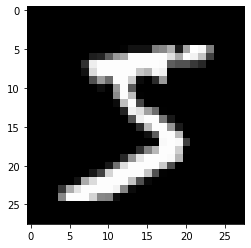

In [17]:
image = x_train[0]
plt.imshow(image, cmap='gray')

In [18]:
y_train[0]

5

In [19]:
x_train.shape[2]

28

### Flattening

In [20]:
x_train_flat = x_train.shape[1] * x_train.shape[2]
x_valid_flat = x_valid.shape[1] * x_valid.shape[2]

In [21]:
x_train_flat

784

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train_flat)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid_flat)

In [23]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
x_train.shape

(60000, 784)

In [25]:
x_valid.shape

(10000, 784)

### Normalizing

In [26]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [27]:
x_train.dtype

dtype('float64')

In [28]:
x_train.min()

0.0

In [29]:
x_train.max()

1.0

### Categorically Encoding the Labels

In [30]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

### Creating the Model

<center><img src="./assets/example-nn.svg"></center>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Input and initial hidden layer
model.add(
    Dense(units=512, activation='relu', input_shape=(x_train.shape[1],))
)

# Second hidden layer
model.add(
   Dense(units = 512, activation='relu')
)

# Output
model.add(
    Dense(units = 10, activation='softmax')
)

In [32]:
513*10

5130

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [34]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

### Test before training

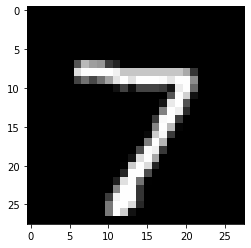

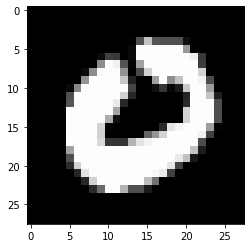

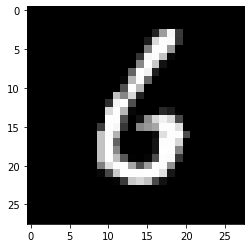

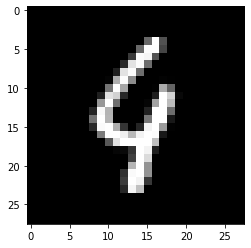

In [35]:
samples = [0, 25, 50, 115]
test_samples = []

for sample in samples:
  # Generate a plot
  reshaped_image = x_valid[sample].reshape((28, 28))
  plt.imshow(reshaped_image, cmap='gray')
  plt.show()
  # Add sample to array for prediction
  test_samples.append(x_valid[sample])

In [36]:
test_samples = np.array(test_samples)
predictions = model.predict(test_samples)
print(predictions)

[[0.10931003 0.08362882 0.06854839 0.08444659 0.13644455 0.08230172
  0.10069224 0.13220505 0.07490095 0.12752162]
 [0.10040364 0.10161241 0.08003037 0.08939403 0.09156192 0.06204144
  0.13993675 0.11748016 0.07973916 0.13780016]
 [0.12050498 0.0789782  0.0720442  0.07730035 0.09233092 0.07904257
  0.12414426 0.11868807 0.09099343 0.14597303]
 [0.1249475  0.08294808 0.09974926 0.07577401 0.10272757 0.07870764
  0.12286153 0.09533601 0.0872196  0.12972885]]


In [37]:
classes = np.argmax(predictions, axis = 1)
print("Prediction before training")
print(classes)

Prediction before training
[4 6 9 9]


### Training the model

In [38]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1961 - accuracy: 0.9426 - val_loss: 0.1003 - val_accuracy: 0.9720
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1023 - accuracy: 0.9723 - val_loss: 0.1020 - val_accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0844 - accuracy: 0.9801 - val_loss: 0.1052 - val_accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0740 - accuracy: 0.9833 - val_loss: 0.1485 - val_accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - accuracy: 0.9865 - val_loss: 0.1508 - val_accuracy: 0.9768


### Test after training

In [39]:
predictions = model.predict(test_samples)
classes = np.argmax(predictions, axis = 1)
print("Prediction after training")
print(classes)

Prediction after training
[7 0 6 4]


## Error

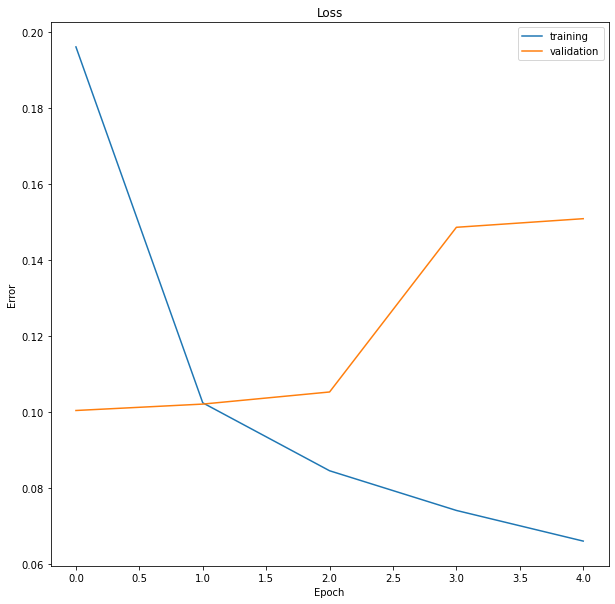

In [40]:
figure = plt.figure(figsize=(10, 10))
plt.title("Loss")
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

## Confusion Matrix

In [41]:
predictions = model.predict(x_valid)
predictions = np.argmax(predictions, axis = 1)

validations = np.argmax(y_valid, axis = 1)

index = np.argwhere((validations == predictions) == False)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
data = confusion_matrix(validations, predictions, labels=np.arange(10))
print(data)

[[ 973    1    1    0    0    0    2    1    2    0]
 [   0 1131    2    0    0    0    1    0    1    0]
 [   3    3 1012    2    1    0    1    4    6    0]
 [   1    0    5  975    0    6    0    6   11    6]
 [   1    1    4    0  970    0    2    0    0    4]
 [   3    0    1   11    2  844   12    1   13    5]
 [   6    2    0    1    4    1  942    0    2    0]
 [   3    4   11    0    5    0    0  993    3    9]
 [   4    2    3    1    4    1    4    2  948    5]
 [   2    2    0    3   15    1    1    3    2  980]]


In [43]:
import itertools

def plot_confusion_matrix(conf_matrix, class_names):
    
    figure = plt.figure(figsize=(10, 10))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # Use white text if squares are dark; otherwise black.
    threshold = conf_matrix.max() / 2.

    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        color = "white" if conf_matrix[i, j] > threshold else "black"
        plt.text(j, i, conf_matrix[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

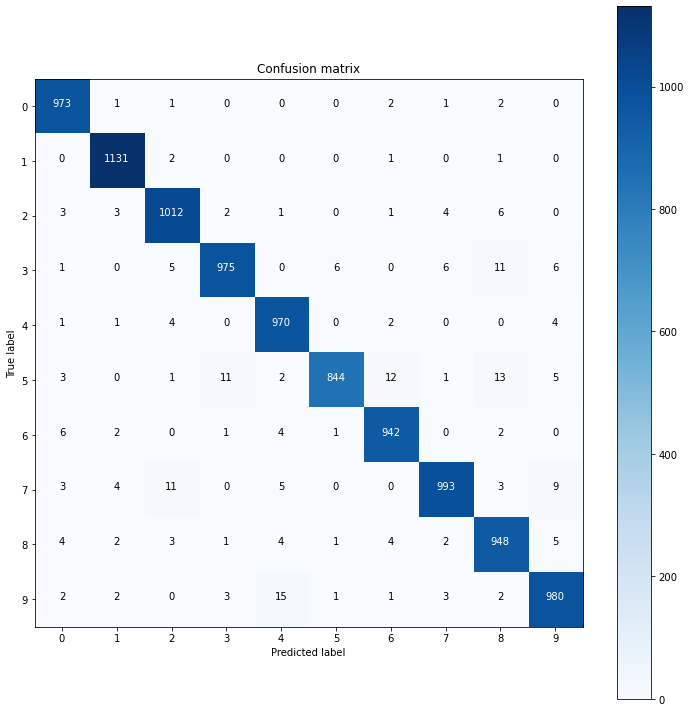

In [44]:
plot_confusion_matrix(data, class_names)

## Assignment

Create a neural network for [American Sign Language alphabec](http://www.asl.gs/), using this dataset [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist) from [kaggle](https://www.kaggle.com/) which has the same format as the MNIST data.

**Objetives:**
- Explore and prepare image data for training and validation
- Create and compile a simple model for image classification
- Train an image classification model and observe the results

The model specifications are as follows:
- Dense input layer. 
- First hidden layer with **512 neurons** fully connected, use the `relu` activation function.
- Second hidden layer with **512 neurons** fully connected, use the `relu` activation function.
- Dense output layer with **neurons equal to the number of classes**, using the `softmax` activation function.

Use [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) to reflect the fact that we want to fit into one of many categories, and measuring the accuracy of our model.

> **Note:** Because the dataset is composed of still images it ignores the letters J and Z as these letters contain movement.

Training specifications:
- Use the model's `fit` method to train it for **20 epochs** using the training and validation images and labels

Discussion:
- What is observed in the training results and why does it happen?